In [6]:
#GANANCIA dB VS FRECUENCIA HZ

import ltspice
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import sympy as sp
from matplotlib.ticker import MultipleLocator 
import pandas as pd

raw_file = 'filtro_norma.raw'
l = ltspice.Ltspice(raw_file)
l.parse()

#Extracción de datos

#Desfasaje

vo_sim_offset = 1
freq_med_offset = 0

#Definición de señales

# Get the frequency data
freq_sim = l.get_data('frequency')
#freq_teo = pf_teo[0]

# Get the voltage data for the input and output nodes
vo_sim = l.get_data('V(Vo_fil)') * vo_sim_offset

# Calculate the phase
phase_sim = np.angle(vo_sim, deg=True)



In [7]:
from sympy import pretty
from IPython.display import display, Math
import scipy.signal as signal
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt 

#Constantes

import matplotlib.pyplot as plt 
R1, R2, C1, C2,R12, R22, C12, C22,R13, R23, C13, C23, f = sp.symbols('R1, R2, C1, C2,R12, R22, C12, C22,R13, R23, C13, C23, f', Real=True)
s= sp.symbols('s')
#.param r1= 1000 r2= 3300 c1= 10n c2= 120p r12= 1000 r22= 3300 c12= 3.3n c22= 560p r13= 1000 r23= 3300 c13= 2.2n c23= 1.5n
a1= R1*R2*C1*C2
b1=(R1*C2)+(R2*C2)
c1=1

H1=1/((s*s*(a1))+s*(b1)+(c1))

a2=R12*R22*C12*C22
b2= (R12*C22)+(R22*C22)
c2=1

H2=1/((s*s*(a2))+s*(b2)+(c2))

a3=R13*R23*C13*C23
b3= (R13*C23)+(R23*C23)
c3=1

H3=1/((s*s*(a3))+s*(b3)+(c3))

Ht= H1*H2*H3
printt = sp.latex(Ht)
display(Math(printt))

Hs=sp.simplify(Ht)

Hjw=Hs.subs(s, sp.I*(f*2*np.pi))

Hs_func=sp.lambdify([R1, R2, C1, C2,R12, R22, C12, C22,R13, R23, C13, C23, f], Hjw, 'numpy')
wrange= np.logspace(0,15, int(1e6), base=10)
func_posta= Hs_func(1000, 3300, 10e-9, 120e-12, 1000, 3300, 3.3e-9, 560e-12, 1000, 3300, 2.2e-9, 1.5e-9, wrange)
func_posta_arg= np.angle(func_posta)
func_posta_abs= np.abs(func_posta)

<IPython.core.display.Math object>

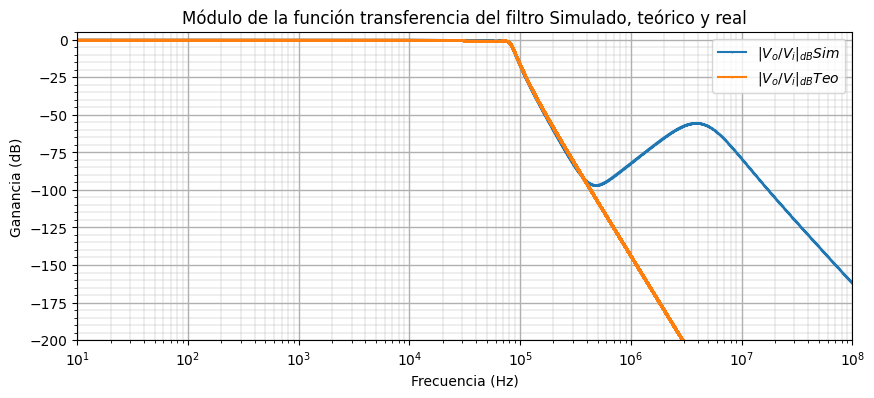

In [8]:
ax_bode, ax_bode = plt.subplots(figsize=(10,4))

# Ploteo Diagrama Simulado
ax_bode.semilogx(freq_sim, 20 * np.log10(np.abs(vo_sim)), label='$|{V_{o}/{V_i}}|_{dB} Sim$', linestyle='solid', marker='o',markersize=0.3)
ax_bode.semilogx(wrange,20 * np.log10(np.abs(func_posta_abs)), label='$|{V_{o}/{V_i}}|_{dB} Teo$',linestyle='solid', marker='o', markersize=0.3)
#Edición de presentación

ax_bode.set(xlabel='Frecuencia (Hz)', ylabel='Ganancia (dB)', title='Módulo de la función transferencia del filtro Simulado, teórico y real')
ax_bode.grid(True)

#Límites del gráfico

ax_bode.set_xlim(1*10**1, 1*10**8)
ax_bode.set_ylim(-200, 5)
#ax_phase.set_xlim(3000,600000)
# ax.yaxis.set_major_locator(MultipleLocator(5))

ax_bode.grid(visible=True, which='both', axis='both',linewidth=0.3)
ax_bode.grid(visible=True, which='major', axis='both',linewidth=1)
ax_bode.legend()
ax_bode.minorticks_on()

plt.minorticks_on()
plt.legend()
plt.show()

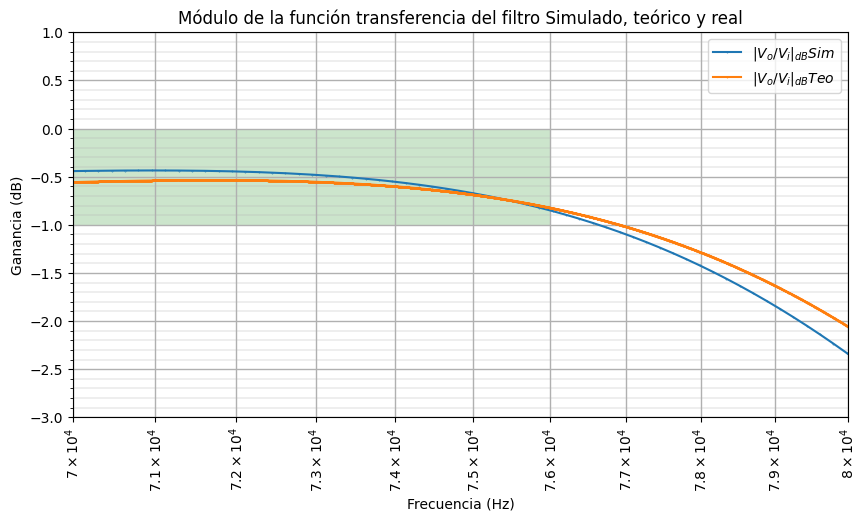

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator 

# Your existing code

fig, ax_bode = plt.subplots(figsize=(10, 5))

# Ploteo Diagrama Simulado
ax_bode.semilogx(freq_sim, 20 * np.log10(np.abs(vo_sim)), label='$|{V_{o}/{V_i}}|_{dB} Sim$', linestyle='solid', marker='o', markersize=0.3)
ax_bode.semilogx(wrange, 20 * np.log10(np.abs(func_posta_abs)), label='$|{V_{o}/{V_i}}|_{dB} Teo$', linestyle='solid', marker='o', markersize=0.3)

# Edición de presentación
ax_bode.set(xlabel='Frecuencia (Hz)', ylabel='Ganancia (dB)', title='Módulo de la función transferencia del filtro Simulado, teórico y real')
ax_bode.grid(True)

# Límites del gráfico
ax_bode.set_xlim(70000, 80000)
ax_bode.set_ylim(-3, 1)
ax_bode.xaxis.set_major_locator(MultipleLocator(1000))

# Rotate X-axis tick labels vertically
ax_bode.tick_params(axis='x', rotation=90)

ax_bode.grid(visible=True, which='both', axis='both', linewidth=0.3)
ax_bode.grid(visible=True, which='major', axis='both', linewidth=1)
ax_bode.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
ax_bode.minorticks_on()
ax_bode.add_patch(Rectangle((70000, -1), 6000, 1, linewidth=1, facecolor='green', alpha=0.2))
ax_bode.add_patch(Rectangle((152000, -50), 10000, 10, linewidth=1, facecolor='green', alpha=0.2))
plt.minorticks_on()
plt.legend()
plt.show()

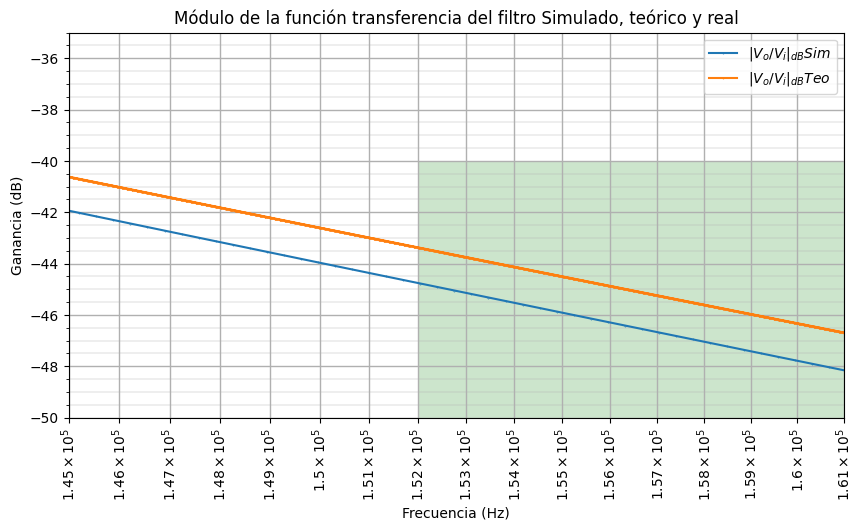

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator 

# Your existing code

fig, ax_bode = plt.subplots(figsize=(10, 5))

# Ploteo Diagrama Simulado
ax_bode.semilogx(freq_sim, 20 * np.log10(np.abs(vo_sim)), label='$|{V_{o}/{V_i}}|_{dB} Sim$', linestyle='solid', marker='o', markersize=0.3)
ax_bode.semilogx(wrange, 20 * np.log10(np.abs(func_posta_abs)), label='$|{V_{o}/{V_i}}|_{dB} Teo$', linestyle='solid', marker='o', markersize=0.3)

# Edición de presentación
ax_bode.set(xlabel='Frecuencia (Hz)', ylabel='Ganancia (dB)', title='Módulo de la función transferencia del filtro Simulado, teórico y real')
ax_bode.grid(True)

# Límites del gráfico
ax_bode.set_xlim(145000,161000)
ax_bode.set_ylim(-50, -35)
ax_bode.xaxis.set_major_locator(MultipleLocator(1000))

# Rotate X-axis tick labels vertically
ax_bode.tick_params(axis='x', rotation=90)

ax_bode.grid(visible=True, which='both', axis='both', linewidth=0.3)
ax_bode.grid(visible=True, which='major', axis='both', linewidth=1)
#ax_bode.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
ax_bode.minorticks_on()
ax_bode.add_patch(Rectangle((152000, -50), 10000, 10, linewidth=1, facecolor='green', alpha=0.2))
plt.minorticks_on()
plt.legend()
plt.show()